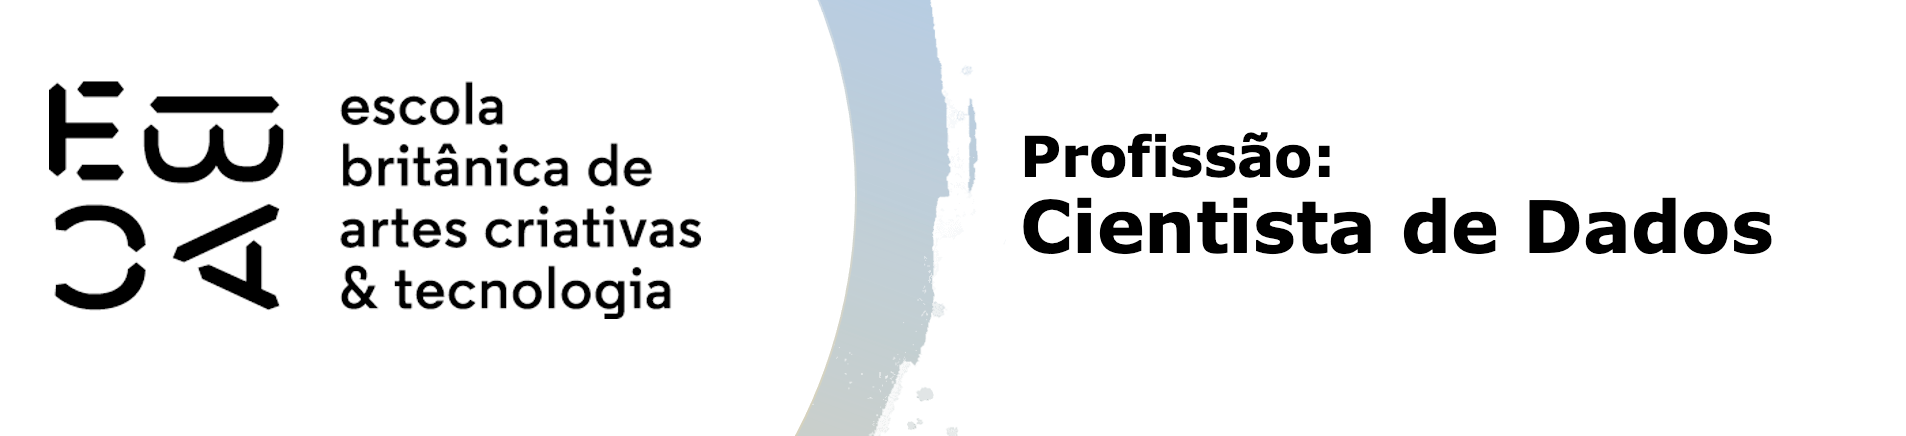

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [119]:
base = pd.read_csv('online_shoppers_intention.csv')

In [120]:
df = base.iloc[: , :6]

In [121]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 578.1 KB


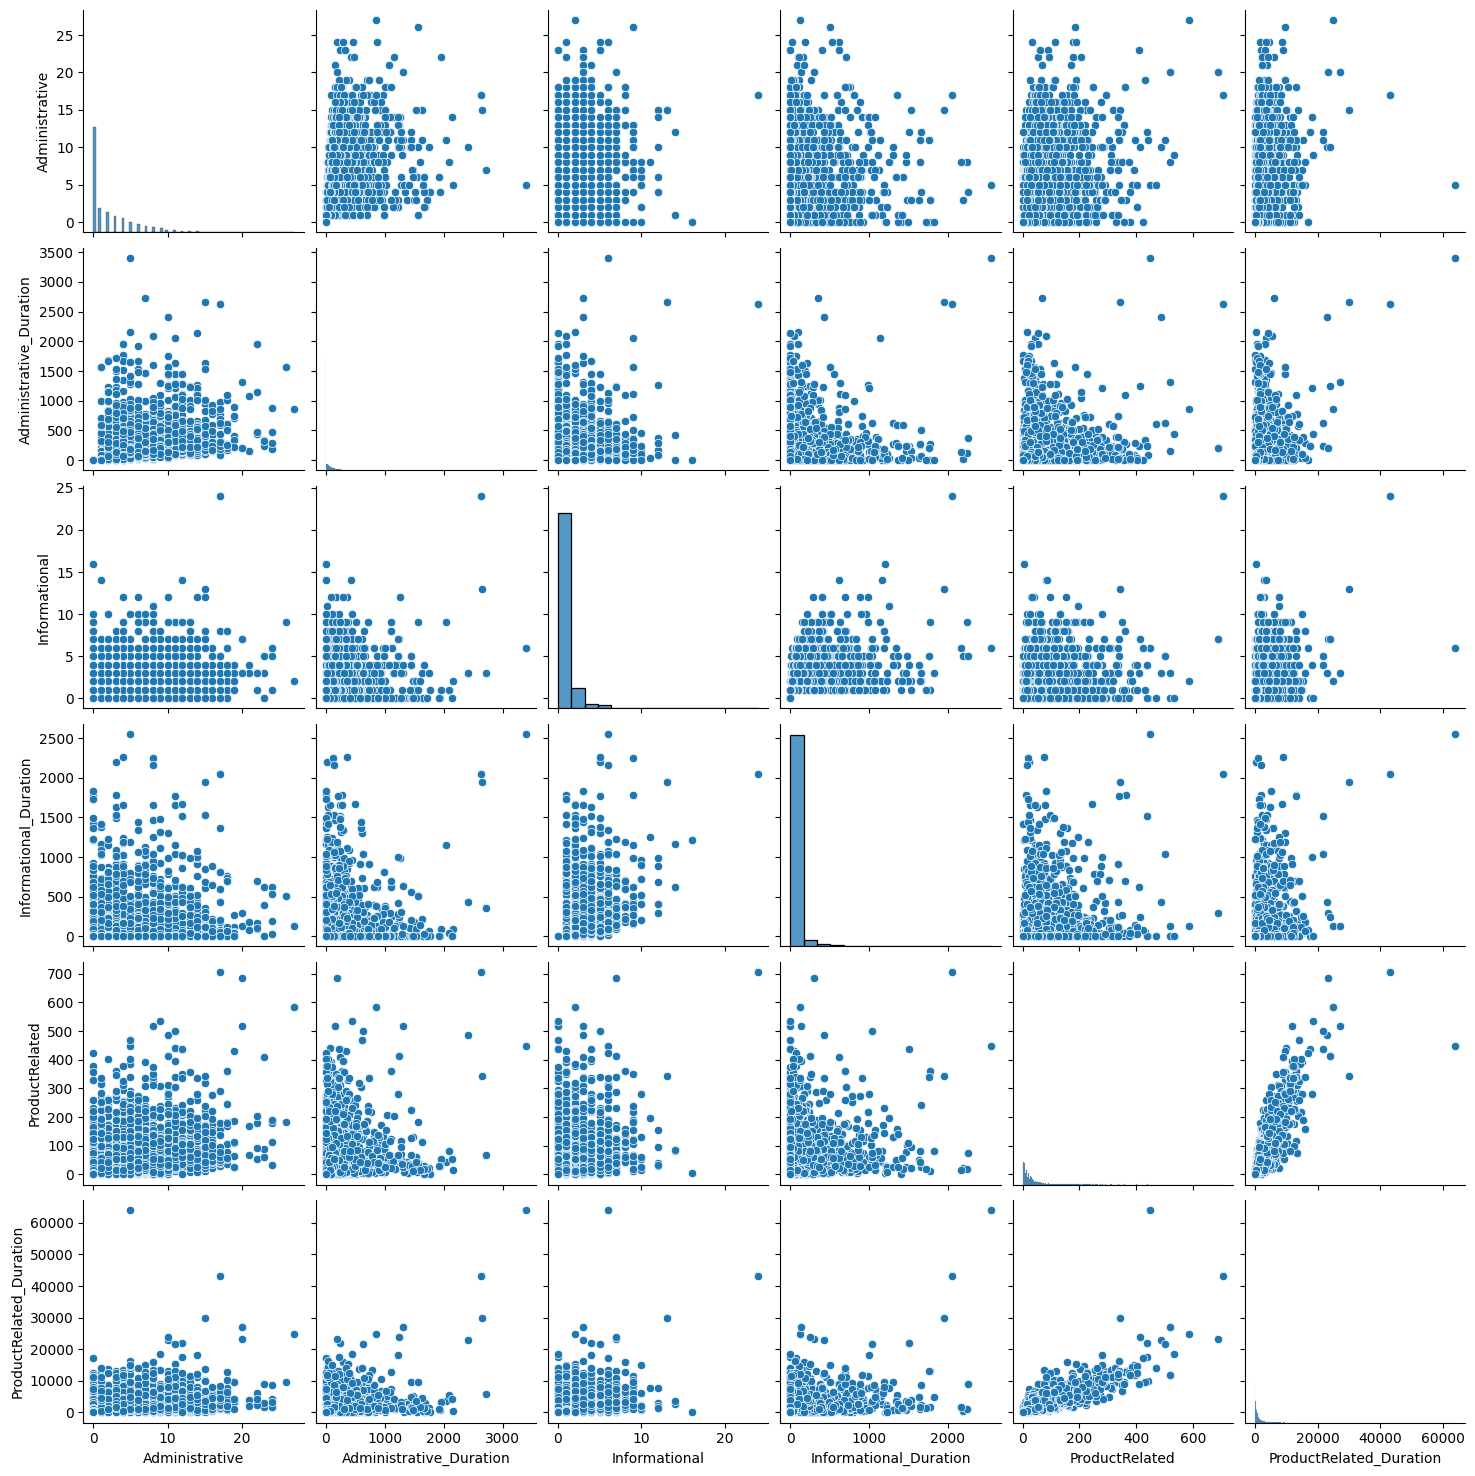

In [123]:
sns.pairplot(df);

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [124]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df))

In [125]:
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df_pad)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

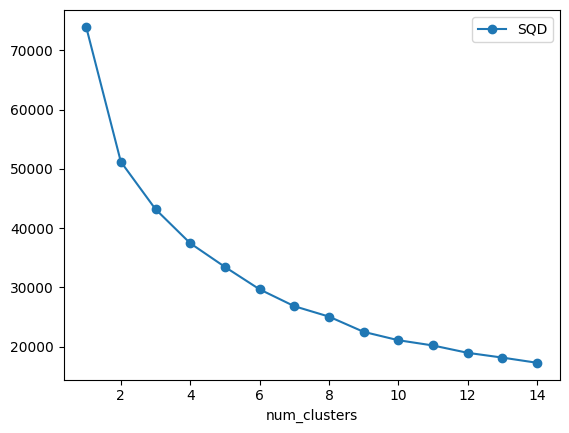

In [126]:
df2 = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df2.plot(x = 'num_clusters', y = 'SQD' , marker = 'o');

In [127]:
# Converte os nomes das colunas para strings
df_pad.columns = df_pad.columns.astype(str)

# Lista para armazenar as pontuações de silhueta
silhuetas = []
# Número máximo de grupos a testar
max_clusters = 10

# DataFrame para armazenar as colunas de grupos
df_grupos = pd.DataFrame(index=df_pad.index)

# Loop que percorre de 2 até o número máximo de clusters
for n_clusters in tqdm(range(2, max_clusters + 1)):
    # Executa o k-means no DataFrame com dados numéricos
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(df_pad)
    
    # Calcula a pontuação de silhueta e armazena na lista 'silhuetas'
    silhuetas.append(silhouette_score(df_pad, km.labels_))
    
    # Define os nomes dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    
    # Adiciona uma coluna ao DataFrame de grupos com os rótulos de agrupamento
    df_grupos['grupos_' + str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)




  0%|          | 0/9 [00:00<?, ?it/s]

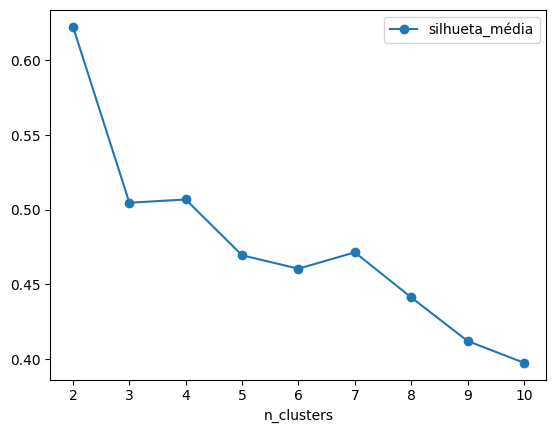

In [132]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})
df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_média', marker='o');

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [133]:
clusters = [2 , 3]
agrupamentos = []
for n in clusters:
    kmeans = KMeans(n_clusters = n , max_iter = 600 , random_state = 21)
    k = kmeans.fit(df_pad)
    agrupamentos.append(k)

In [137]:
df_cluster_2 = df.copy()
df_cluster_2['Grupos'] = agrupamentos[0].labels_
df_cluster_2['Grupos'] = df_cluster_2['Grupos'].replace({0 : 'Baixo engajamento' , 1 : 'Alto engajamento'});

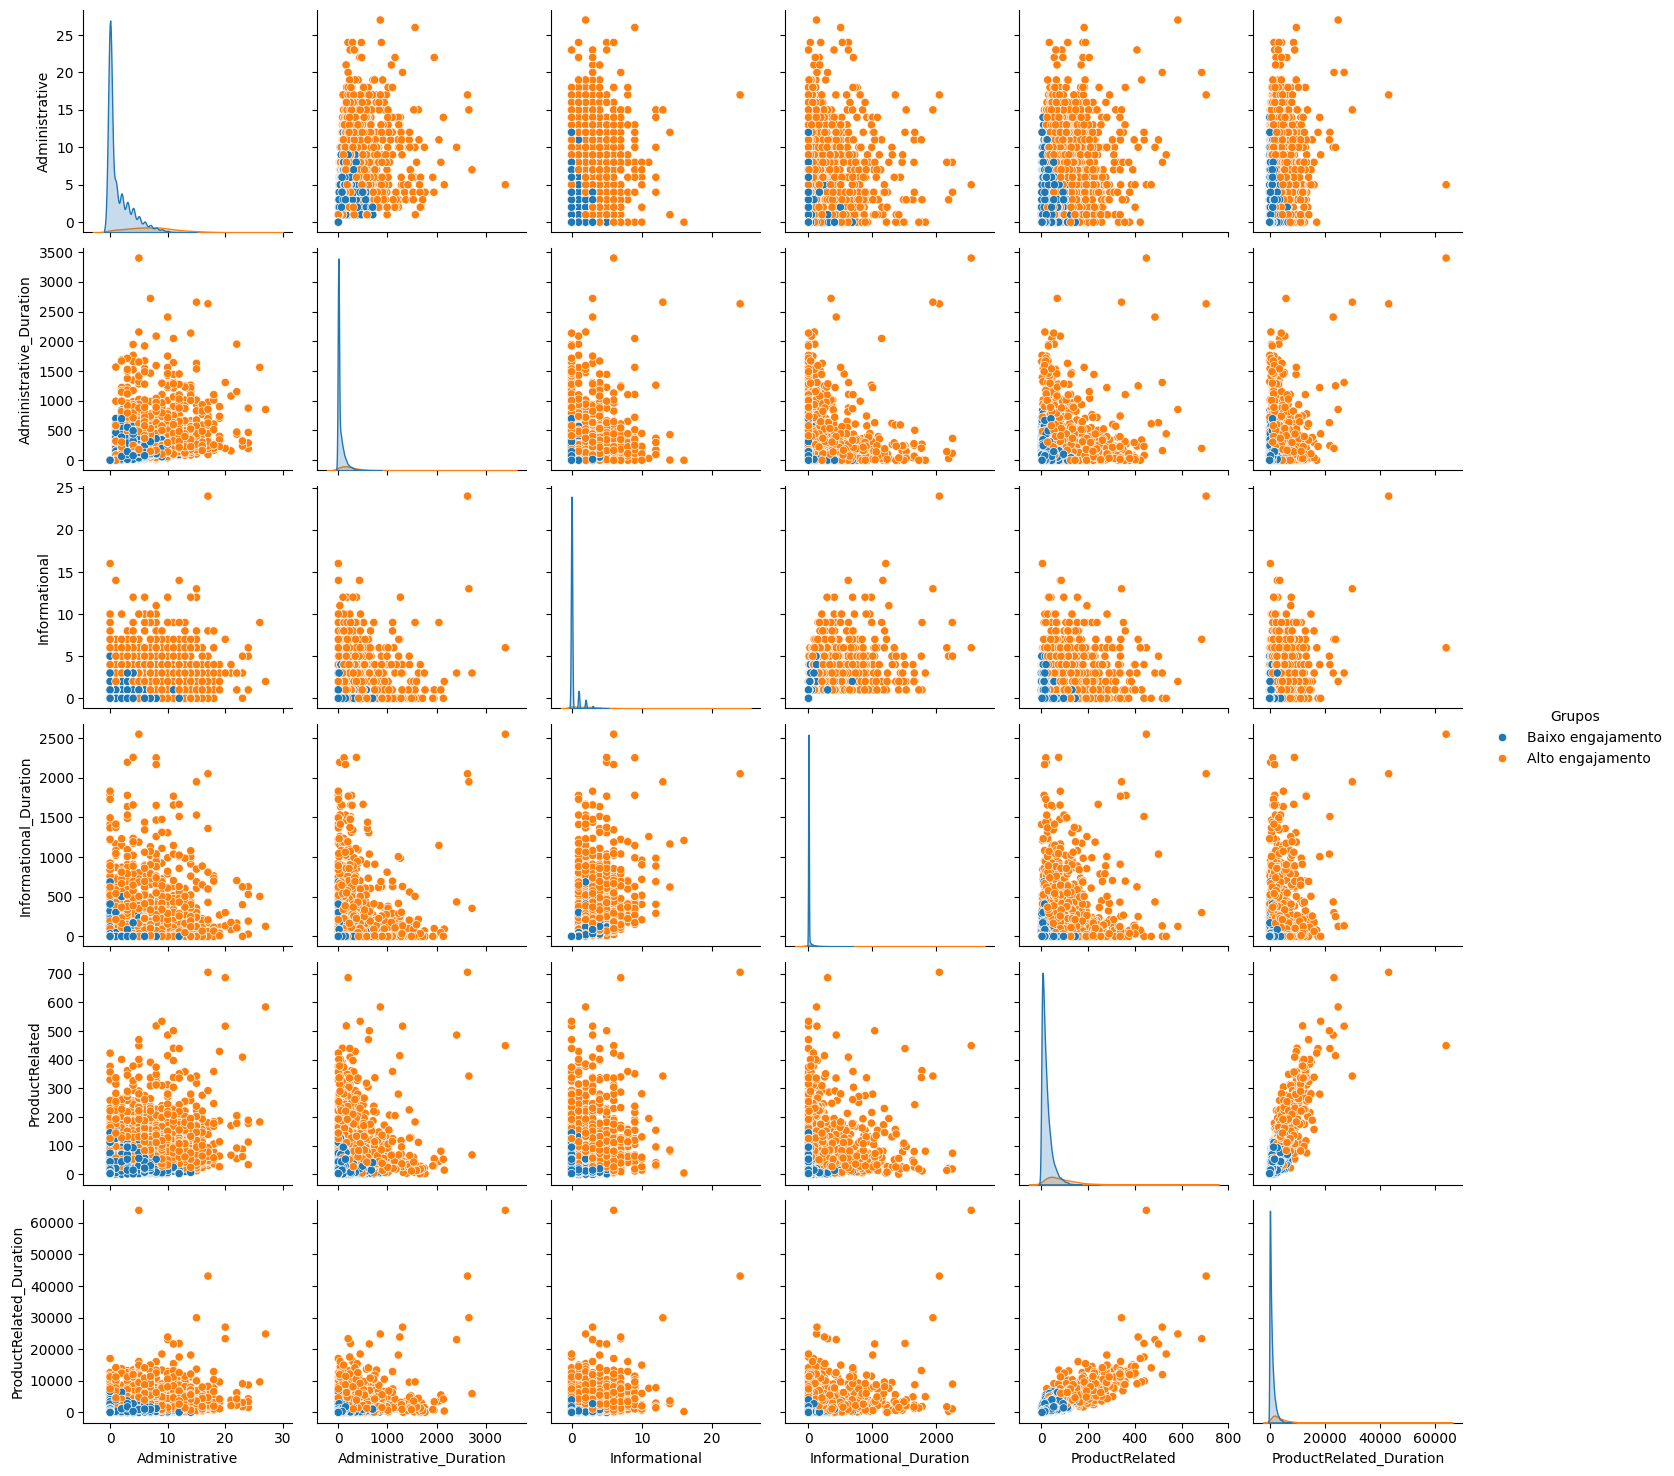

In [138]:
sns.pairplot(df_cluster_2 , hue = 'Grupos');

In [139]:
df_cluster_3 = df.copy()
df_cluster_3['Grupos'] = agrupamentos[1].labels_
df_cluster_3['Grupos'] = df_cluster_3['Grupos'].replace({0 : 'Visitante ocasional' , 1 : 'Visitante interessado' , 2 : 'Compradores ativos'})

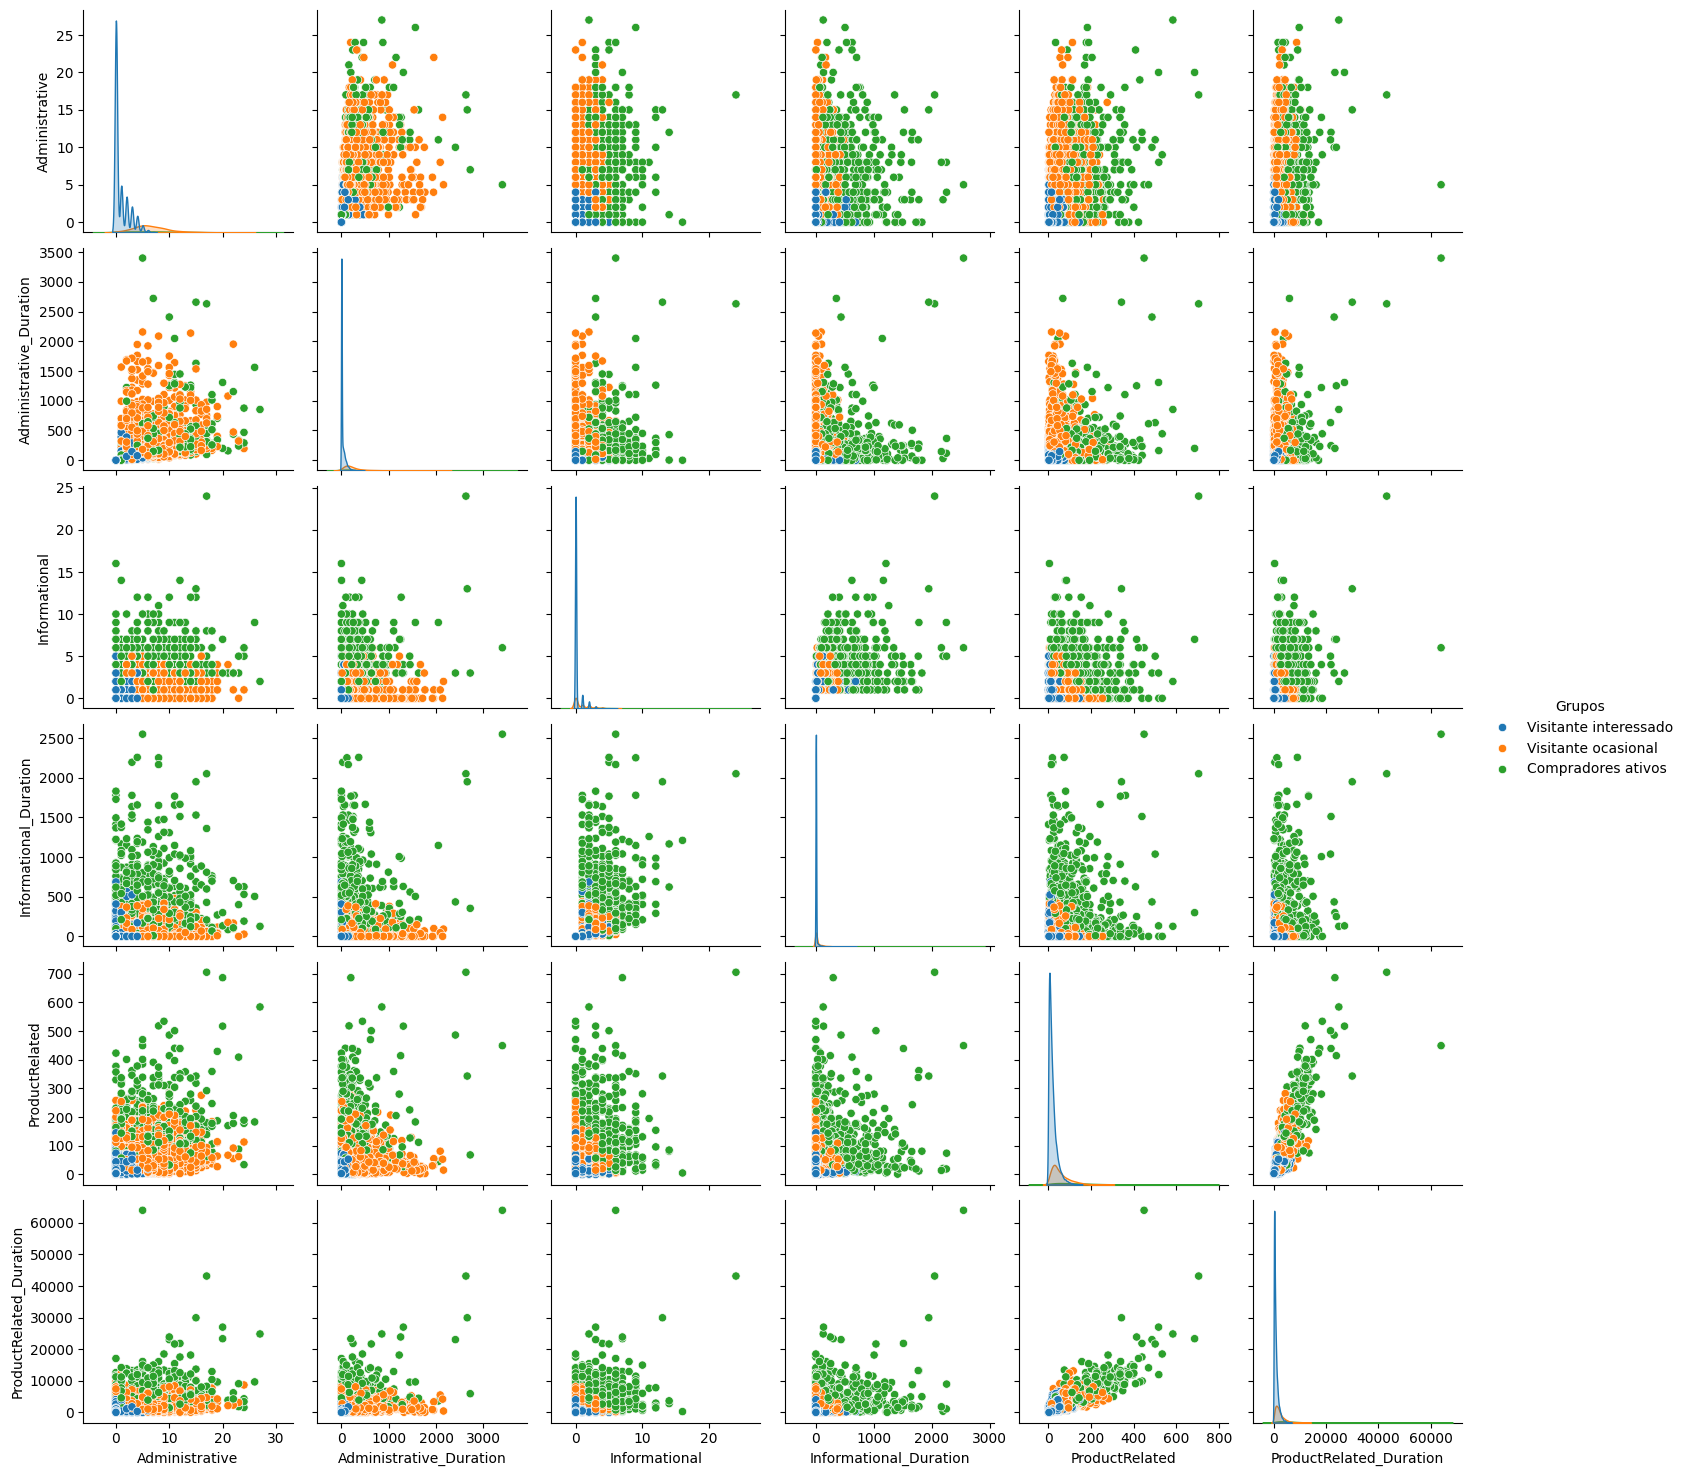

In [140]:
sns.pairplot(df_cluster_3 , hue = 'Grupos');

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

### Cluster 2 grupos

In [141]:
df_cluster_2[['bounce rate' , 'Revenue']] = base[['BounceRates' , 'Revenue']]
df_cluster_3[['bounce rate' , 'Revenue']] = base[['BounceRates' , 'Revenue']]

In [142]:
df_cluster_2.groupby('Grupos')[['bounce rate', 'Revenue']].mean()

,bounce rate,Revenue
Grupos,,
Alto engajamento,0.006483,0.273402
Baixo engajamento,0.024793,0.135092


In [145]:
pd.crosstab(df_cluster_2['Grupos'] , df_cluster_2['Revenue'])

Revenue,False,True
Grupos,,
Alto engajamento,1273,479
Baixo engajamento,9149,1429


Nesse caso, o grupo com menor "**Alto engajamento**" realmente passa mais tempo entretido no site e com uma conversão em compras maior proporcionalmente do que o grupo de Baixo engajamento.

### Cluster 3 grupos

In [149]:
df_cluster_3.groupby('Grupos')[['bounce rate', 'Revenue']].mean()

,bounce rate,Revenue
Grupos,,
Compradores ativos,0.006750,0.306878
Visitante interessado,0.027315,0.124987
Visitante ocasional,0.006493,0.231609


In [148]:
pd.crosstab(df_cluster_3['Grupos'] , df_cluster_3['Revenue'])

Revenue,False,True
Grupos,,
Compradores ativos,393,174
Visitante interessado,8128,1161
Visitante ocasional,1901,573


Nesse caso, o grupo "**Compradores ativos**" passa menos tempo entretido no site e porém, com uma conversão em compras maior proporcionalmente do que o grupo de '**Visitante interessado**'. Já os '**Visitantes ocasionais** interagem menos com o site, mas possuem uma taxa de conversão de compras maior do que os '**Visitantes interessados**'